# An implementation of gradient descent to optimize shallow neural network's parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Helper functions

### Activation functions

In [2]:
# ReLu
def ReLu(Z):
    """
    This function applies a ReLu transformation to the input Z.
    """
    
    return np.maximum(0, Z)


# test
Z_test = np.array([[-1, 2, 3, -4], [1, 5, -3, 2]])
print("ReLu(Z_test) =", ReLu(Z_test))

ReLu(Z_test) = [[0 2 3 0]
 [1 5 0 2]]


In [3]:
# sigmoid
def sigmoid(Z):
    """
    This function applies a Sigmoid transformation to the input Z.
    """
    
    return 1 / (1 + np.exp(-Z))


# test
Z_test = np.array([[-1, 2, 3, -4], [1, 5, -3, 2]])
print("sigmoid(Z_test) =", sigmoid(Z_test))

sigmoid(Z_test) = [[0.26894142 0.88079708 0.95257413 0.01798621]
 [0.73105858 0.99330715 0.04742587 0.88079708]]


### Derivatives

In [4]:
def ReLu_prime(Z):
    """
    This function returns the derivative of ReLu given input Z.
    """
    
    return np.where(Z < 0, 0, 1)


# test
Z_test = np.array([[-1, 2, 3, -4], [1, 5, -3, 2]])
print("ReLu_prime(Z_test) =", ReLu_prime(Z_test))

ReLu_prime(Z_test) = [[0 1 1 0]
 [1 1 0 1]]


### Function for one step of forward propagation

In [5]:
# one layer of forward prop
def get_activations(A_input, W, b, activation):
    """
    This function computes and returns the activisions of one layer of neurons.
    """
    
    Z = np.dot(W, A_input) + b
    return Z, activation(Z)


# test
A_input_test = np.array([[-1, 2, 3, -4], [1, 5, -3, 2]])
W_test = np.array([[1, 2], [0, -1], [-3,1]])
b_test = np.array([[0], [-1], [2]])
activision_test = ReLu
print("A_input_test =", A_input_test)
print("W_test =", W_test)
print("b_test =", b_test)
print("Z =", get_activations(A_input_test, W_test, b_test, activision_test)[0])
print("activisions =", get_activations(A_input_test, W_test, b_test, activision_test)[1])

A_input_test = [[-1  2  3 -4]
 [ 1  5 -3  2]]
W_test = [[ 1  2]
 [ 0 -1]
 [-3  1]]
b_test = [[ 0]
 [-1]
 [ 2]]
Z = [[  1  12  -3   0]
 [ -2  -6   2  -3]
 [  6   1 -10  16]]
activisions = [[ 1 12  0  0]
 [ 0  0  2  0]
 [ 6  1  0 16]]


# Simulate data

In [6]:
# simulate m examples of nx dimension column vector, X, with each element being a random value in [-0.5, 0.5] following
# a uniform distribution
nx = 2
m = 100000
X = np.random.rand(nx, m) - 0.5
print("X.shape =", X.shape)

X.shape = (2, 100000)


In [7]:
# set the parameters for simulated y, for a 2-layer shallow network, with n1=3 and n2=1
W1 = np.array([[-1, 2], [3, 1.2], [0.5, -2.3]])
b1 = np.array([[0], [-1.8], [0.3]])
W2 = np.array([[1.6, -0.6, 2.5]])
b2 = np.array([[0.4]])

In [8]:
# forward pass
_, A1 = get_activations(A_input=X, W=W1, b=b1, activation=ReLu)
_, A2 = get_activations(A_input=A1, W=W2, b=b2, activation=sigmoid)
print("A2.shape =", A2.shape)

A2.shape = (1, 100000)


In [9]:
# simulate m examples of 1-dimensional column vector, Y
Y = np.where(np.random.rand(1, m) < A2, 1, 0)
print("Y.shape =", Y.shape)

Y.shape = (1, 100000)


# Fit a 2-layer neural network to the simulated data

In [10]:
# random initialization for network parameters
n1 = 3
n2 = 1
init_rate = 0.01
W1_model = np.random.randn(n1, nx) * init_rate
b1_model = np.zeros((n1, 1))
W2_model = np.random.randn(n2, n1) * init_rate
b2_model = np.zeros((n2, 1))
print("W1_model =", W1_model)
print("W1_model.shape =", W1_model.shape)
print("b1_model =", b1_model)
print("b1_model.shape =", b1_model.shape)
print("W2_model =", W2_model)
print("W2_model.shape =", W2_model.shape)
print("b2_model =", b2_model)
print("b2_model.shape =", b2_model.shape)

W1_model = [[ 0.01057464 -0.01046116]
 [-0.00860129 -0.00679915]
 [-0.00805217 -0.01768873]]
W1_model.shape = (3, 2)
b1_model = [[0.]
 [0.]
 [0.]]
b1_model.shape = (3, 1)
W2_model = [[0.00432625 0.01039207 0.00868992]]
W2_model.shape = (1, 3)
b2_model = [[0.]]
b2_model.shape = (1, 1)


In [11]:
# gradient descent to optimize network parameters
n_iter = 1000
learning_rate = 0.01
J_list = []

for i in range(n_iter):
    
    # forward prop
    Z1, A1 = get_activations(A_input=X, W=W1_model, b=b1_model, activation=ReLu)
    Z2, A2 = get_activations(A_input=A1, W=W2_model, b=b2_model, activation=sigmoid)
    J = -(np.dot(Y, np.log(A2).T) + np.dot((1 - Y), np.log(1 - A2).T)) / m
    J_list.append(J)
    
    # backward prop
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.multiply(np.dot(W2_model.T, dZ2), ReLu_prime(Z1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    # update parameters
    W1_model = W1_model - learning_rate * dW1
    b1_model = b1_model - learning_rate * db1
    W2_model = W2_model - learning_rate * dW2
    b2_model = b2_model - learning_rate * db2
    
print("W1_model =", W1_model)
print("b1_model =", b1_model)
print("W2_model =", W2_model)
print("b2_model =", b2_model)

W1_model = [[ 0.00957081 -0.01444222]
 [-0.01099026 -0.01624701]
 [-0.01013488 -0.0259362 ]]
b1_model = [[ 6.73541785]
 [16.25634334]
 [13.85070525]]
W2_model = [[0.02307413 0.05391201 0.0481204 ]]
b2_model = [[0.01156943]]


### Check if the cost decreases over model iterations

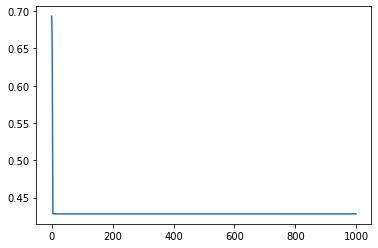

In [12]:
plt.plot([array[0][0] for array in J_list])
plt.show()

### Check model fit

In [13]:
A2

array([[0.84686368, 0.84688448, 0.84697039, ..., 0.84671682, 0.84689545,
        0.84678354]])

In [14]:
Y

array([[0, 1, 1, ..., 0, 1, 1]])

In [15]:
sortedinds = A2.argsort()
sortedinds

array([[43715, 26187, 84541, ..., 16639, 21540, 53790]])

In [16]:
A2_sorted = A2[0][sortedinds[0][:-1]]
A2_sorted

array([0.84660793, 0.84660818, 0.84660877, ..., 0.84703599, 0.84703646,
       0.84703683])

In [18]:
J_list

[array([[0.69312987]]),
 array([[0.67852105]]),
 array([[0.63341393]]),
 array([[0.51287798]]),
 array([[0.42820475]]),
 array([[0.42817989]]),
 array([[0.42817606]]),
 array([[0.42817545]]),
 array([[0.42817534]]),
 array([[0.42817531]]),
 array([[0.42817528]]),
 array([[0.42817526]]),
 array([[0.42817525]]),
 array([[0.42817523]]),
 array([[0.42817521]]),
 array([[0.42817519]]),
 array([[0.42817517]]),
 array([[0.42817515]]),
 array([[0.42817513]]),
 array([[0.42817511]]),
 array([[0.42817509]]),
 array([[0.42817508]]),
 array([[0.42817506]]),
 array([[0.42817504]]),
 array([[0.42817502]]),
 array([[0.428175]]),
 array([[0.42817498]]),
 array([[0.42817496]]),
 array([[0.42817494]]),
 array([[0.42817492]]),
 array([[0.4281749]]),
 array([[0.42817489]]),
 array([[0.42817487]]),
 array([[0.42817485]]),
 array([[0.42817483]]),
 array([[0.42817481]]),
 array([[0.42817479]]),
 array([[0.42817477]]),
 array([[0.42817475]]),
 array([[0.42817473]]),
 array([[0.42817471]]),
 array([[0.4281747]